In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import joblib


In [19]:
!pip install seaborn


In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status',
    'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

In [21]:
data = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

In [22]:
print("Data loaded successfully. Shape:", data.shape)
print("\nMissing values before cleaning:")
print(data.isnull().sum())

Data loaded successfully. Shape: (32561, 15)

Missing values before cleaning:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [23]:
for col in ['workclass', 'occupation', 'native-country']:
    data.fillna({col: data[col].mode()[0]}, inplace=True)


In [24]:
data = data.drop(columns=['education'])

In [25]:
data = data[(data['age'] <= 75) & (data['age'] >= 17)]
data = data[(data['educational-num'] <= 16) & (data['educational-num'] >= 5)]

In [26]:
print("\nData shape after cleaning and outlier removal:", data.shape)


Data shape after cleaning and outlier removal: (31163, 14)


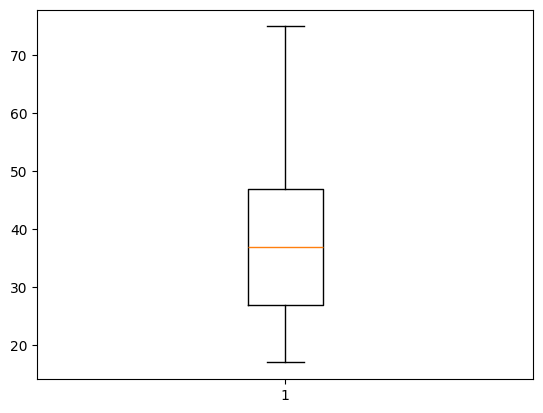

In [15]:
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

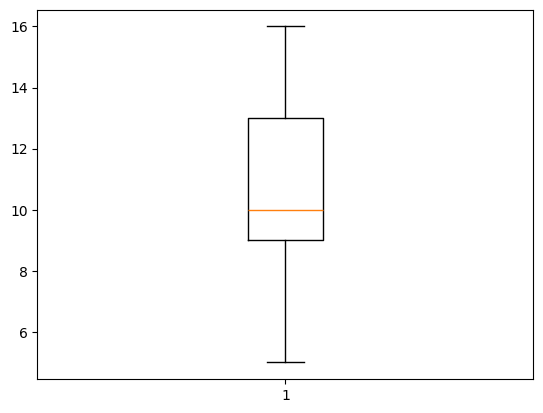

In [27]:
plt.boxplot(data['educational-num'])
plt.show()

In [14]:
X = data.drop('income', axis=1)
y = data['income']

In [15]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [16]:
print("\nTarget classes:", le.classes_)


Target classes: ['<=50K' '>50K']


In [17]:
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

In [18]:
print("\nNumeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Features: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [19]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keeps other columns if any
)

In [21]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [23]:
model_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
y_pred = model_pipeline.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")



✅ Model Accuracy: 0.8648


In [27]:
print("\nClassification Report:")
print(classification_report(le.inverse_transform(y_test), le.inverse_transform(y_pred)))



Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4685
        >50K       0.79      0.63      0.70      1548

    accuracy                           0.86      6233
   macro avg       0.84      0.78      0.80      6233
weighted avg       0.86      0.86      0.86      6233



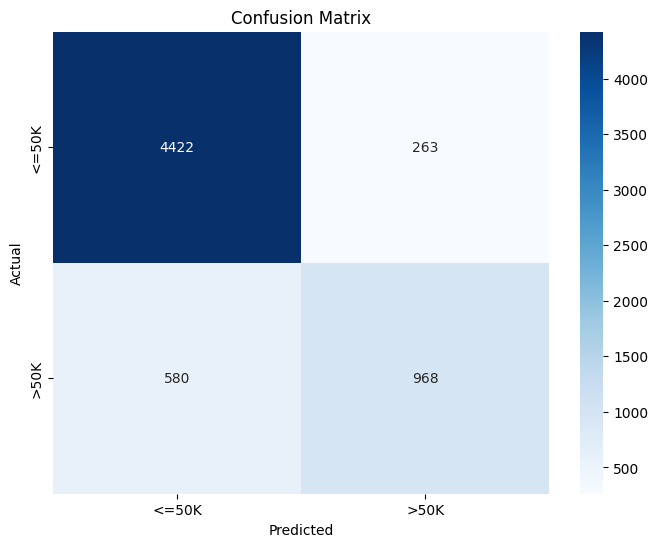

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [29]:
joblib.dump(model_pipeline, 'salary_prediction_pipeline.pkl')
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [30]:
print("\n✅ Pipeline and Label Encoder saved successfully!")
print("   - salary_prediction_pipeline.pkl")
print("   - label_encoder.pkl")


✅ Pipeline and Label Encoder saved successfully!
   - salary_prediction_pipeline.pkl
   - label_encoder.pkl
